<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

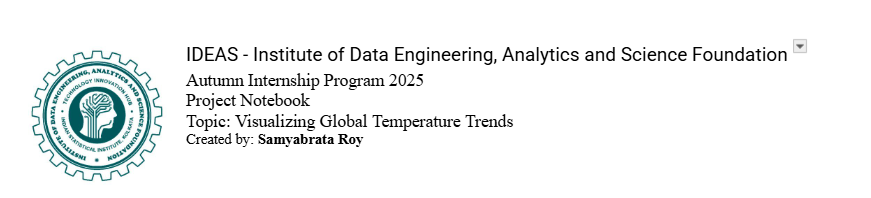

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


In [ ]:
df_temp.head(20)

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
5,GISTEMP,2016-10-06,0.8900
6,GCAG,2016-09-06,0.8767
7,GISTEMP,2016-09-06,0.8700
8,GCAG,2016-08-06,0.8998
9,GISTEMP,2016-08-06,0.9800


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# To read the uploaded file into a pandas DataFrame, you can do:
# import io
# df_uploaded = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
# display(df_uploaded.head())



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

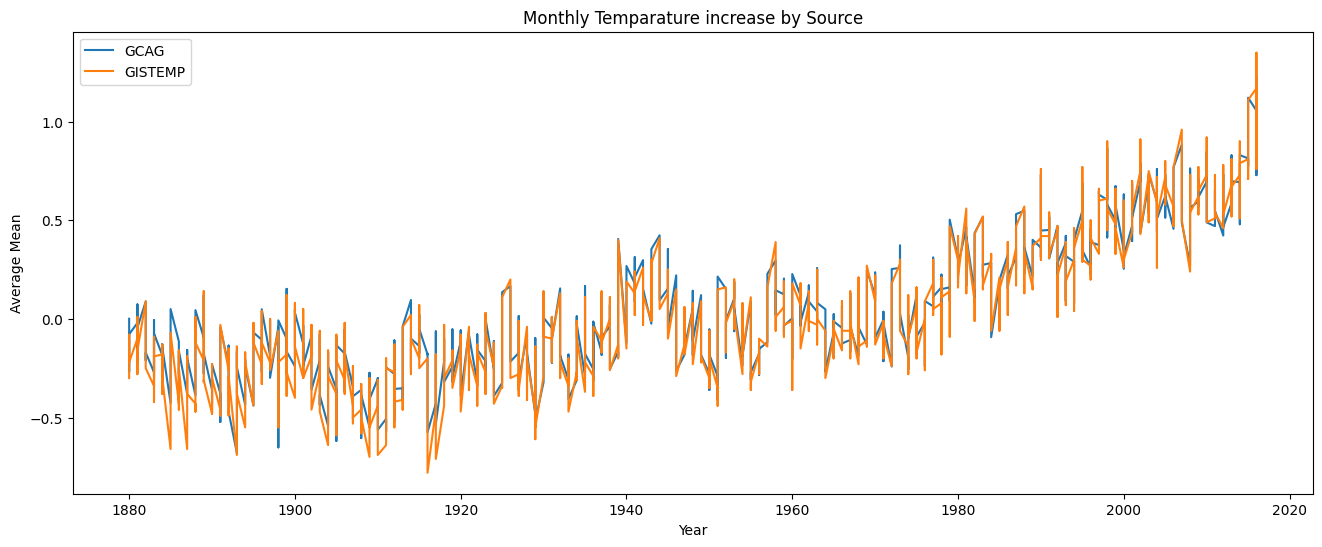

In [ ]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Year from Date
df_temp['Year'] = df_temp['Date'].dt.year


# Plot line chart
plt.figure(figsize=(16,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()



---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

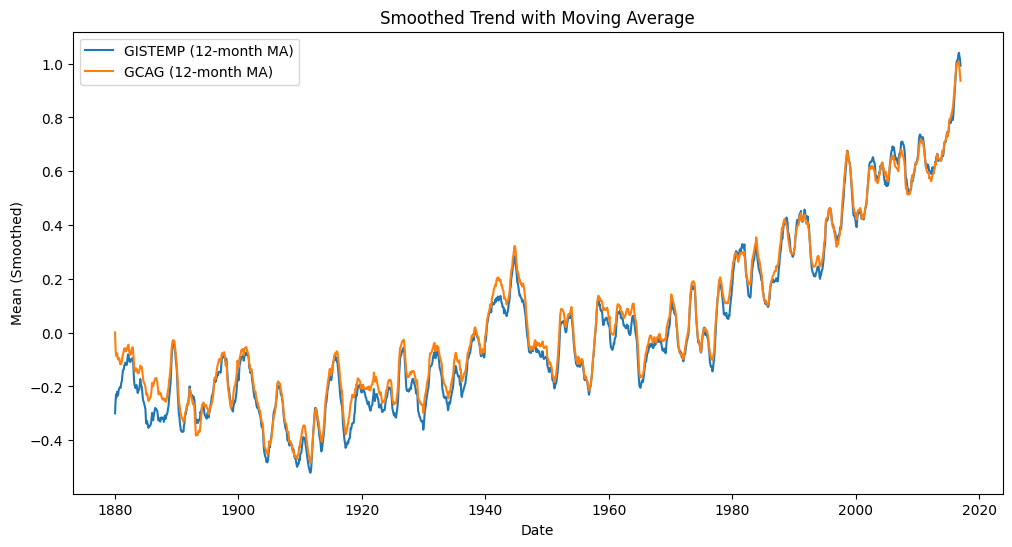

In [ ]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


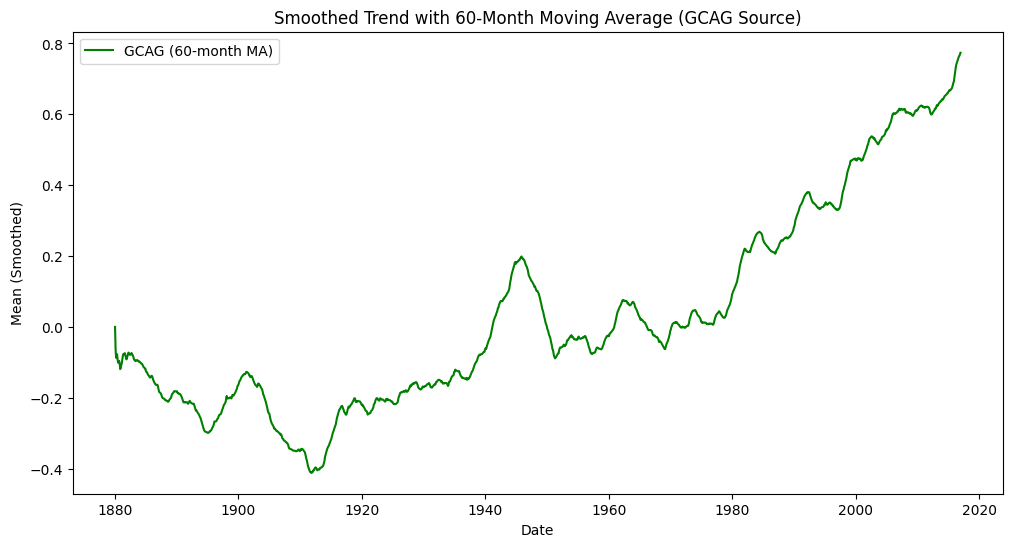

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Filter for one source (e.g., 'GCAG')
df_gcag = df_temp[df_temp['Source'] == 'GCAG'].copy()

# Calculate a larger moving average (e.g., 5-year or 60-month window)
df_gcag['Moving_Avg_60_Month'] = df_gcag['Mean'].rolling(window=60, min_periods=1).mean()

# Plot the smoothed trend
plt.figure(figsize=(12, 6))
plt.plot(df_gcag['Date'], df_gcag['Moving_Avg_60_Month'], label='GCAG (60-month MA)', color='green')
plt.title("Smoothed Trend with 60-Month Moving Average (GCAG Source)")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()




---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

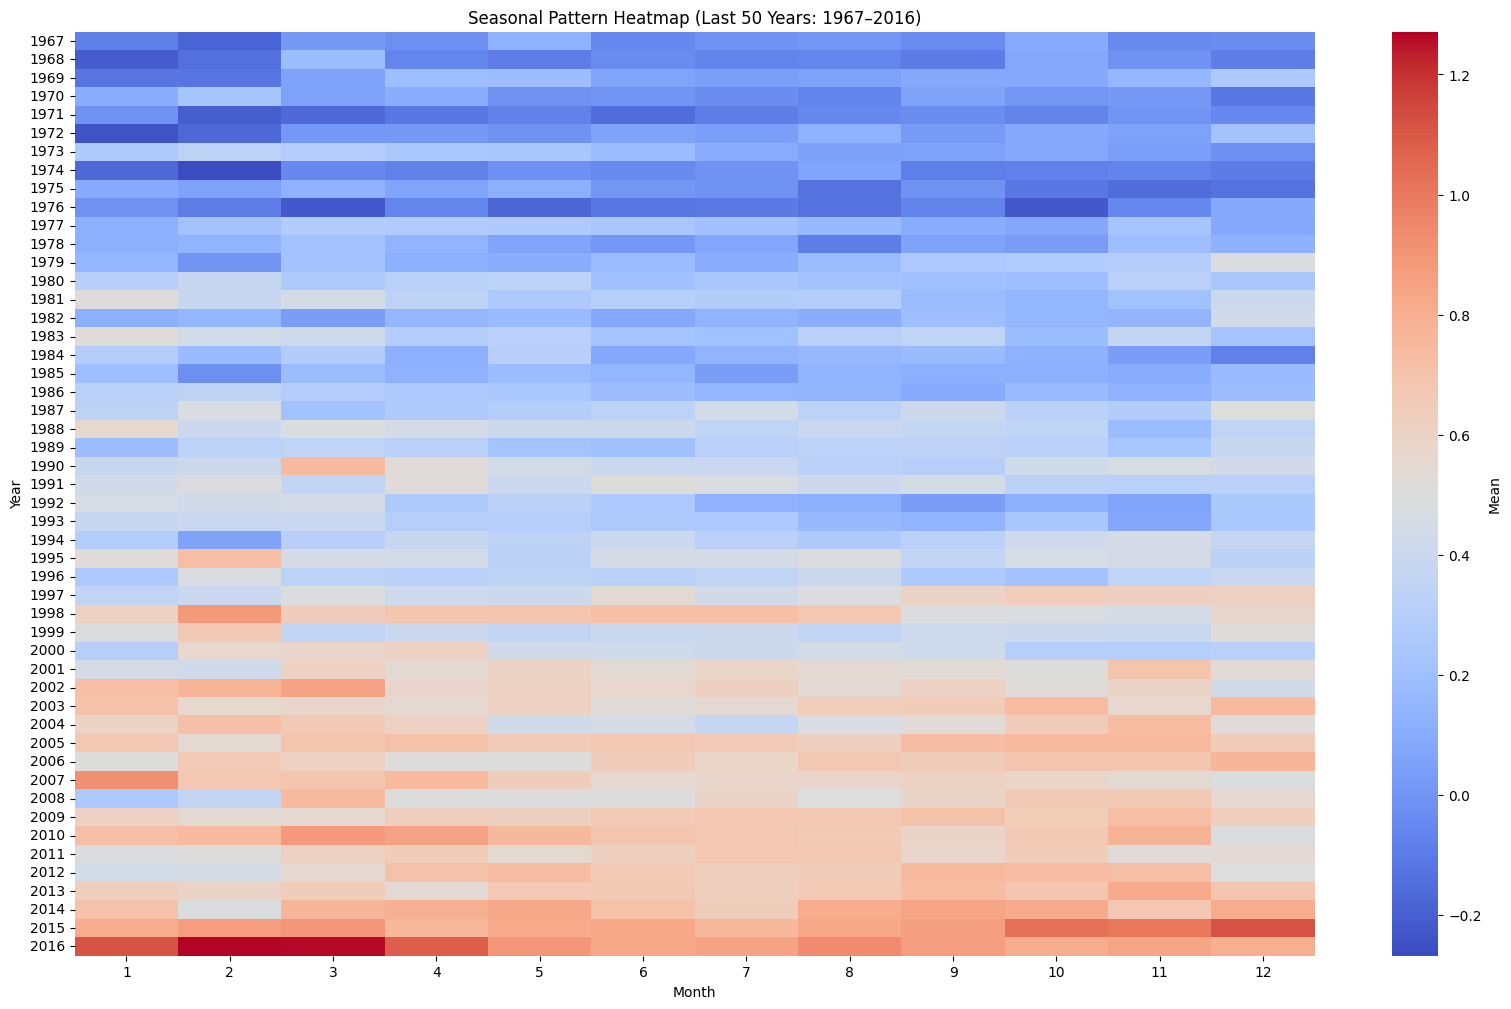

In [ ]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

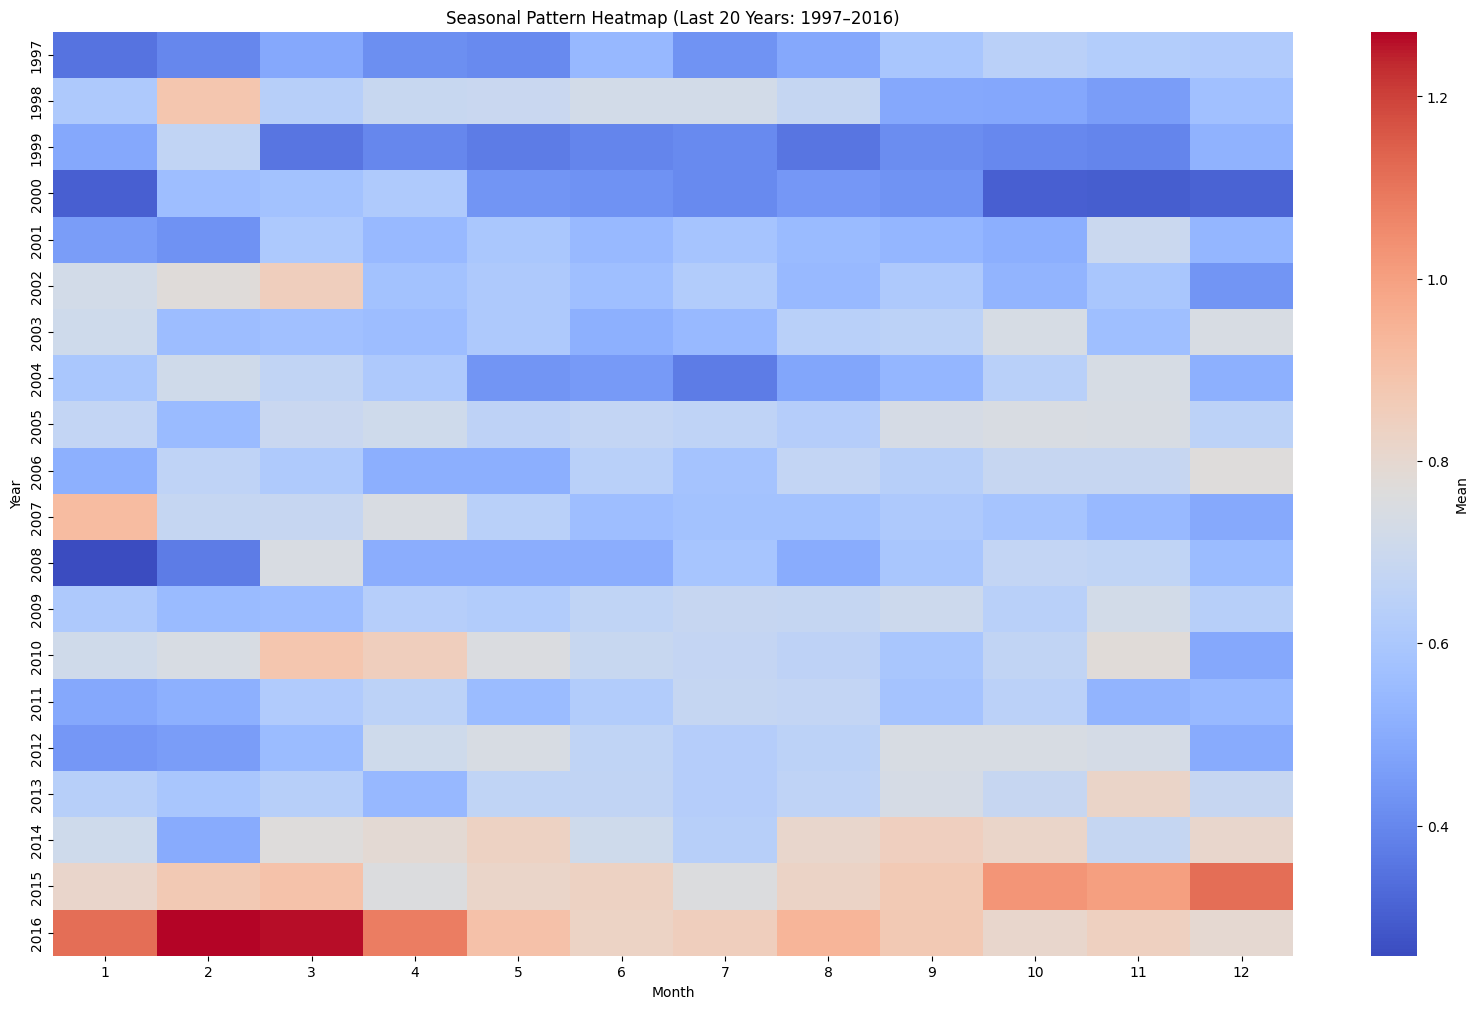

In [ ]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last20.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()



---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


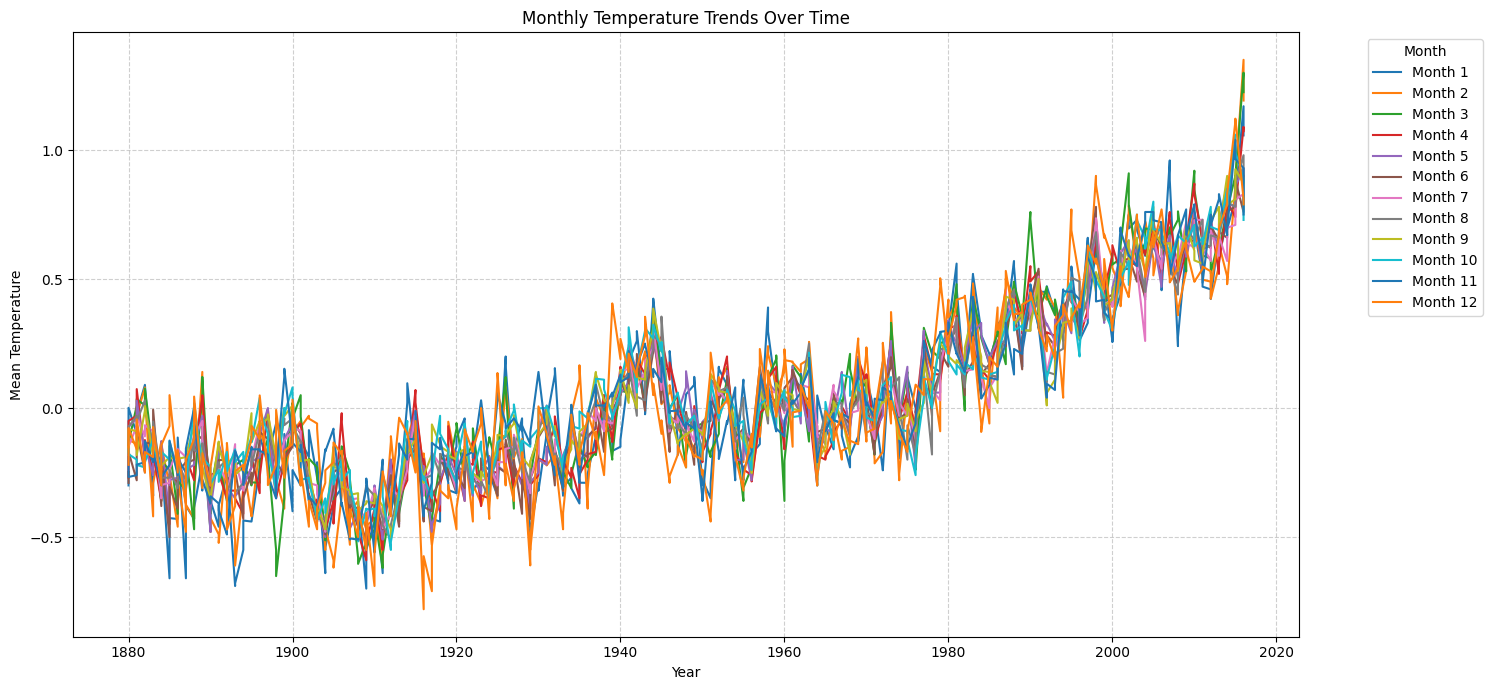

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)

# Convert Date column to datetime and extract Year and Month
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month


# Plotting line plots with monthly lines to show seasonal variation

plt.figure(figsize=(15, 7))
for month in sorted(df_temp['Month'].unique()):
    subset = df_temp[df_temp['Month'] == month]
    plt.plot(subset['Year'], subset['Mean'], label=f'Month {month}')

plt.title('Monthly Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the new dataset from Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/update_temperature.csv'

try:
    df = pd.read_csv(file_path)
    print("Global Environmental Trends Dataset loaded successfully:")
    display(df.head(20))
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Global Environmental Trends Dataset loaded successfully:


,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2
5,2000,India,24.5,0.8,0,1083,1057000000,17.5,27,22.7
6,2000,Nigeria,27.2,0.6,0,1150,122300000,82.5,15,14.8
7,2000,Russia,5.1,10.6,0,460,146600000,15.3,19,49.4
8,2005,United States,13.6,19.6,10,755,296400000,6.7,39,33.0
9,2005,China,13.0,4.5,10,672,1308000000,16.1,29,19.2


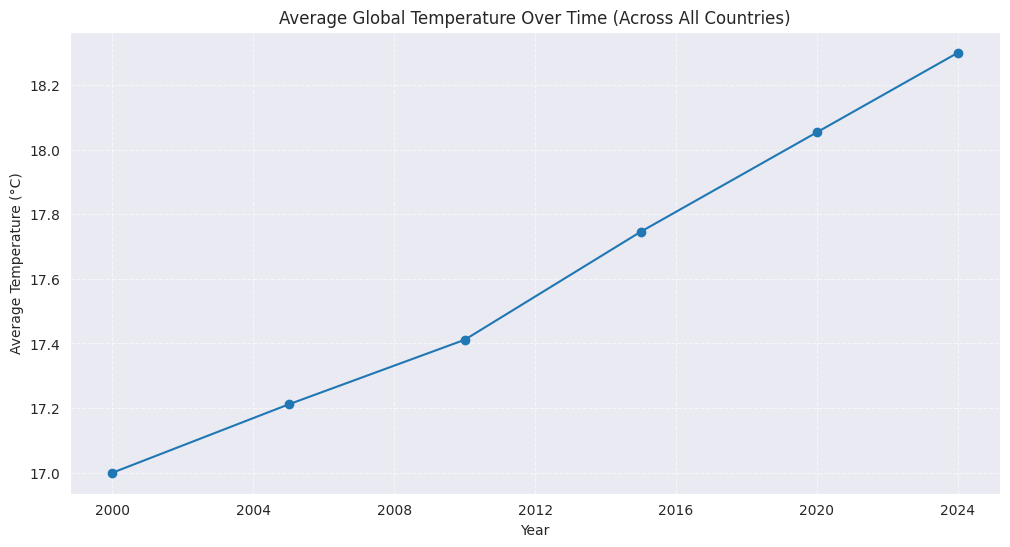

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Year and calculate the average temperature
yearly_avg_temp = df.groupby('Year')['Avg_Temperature_degC'].mean().reset_index()

# Plot the average temperature over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp['Year'], yearly_avg_temp['Avg_Temperature_degC'], marker='o', linestyle='-')
plt.title('Average Global Temperature Over Time (Across All Countries)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-3307740739.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Temperature_degC', y='Country', data=avg_temp_by_country, palette='viridis')


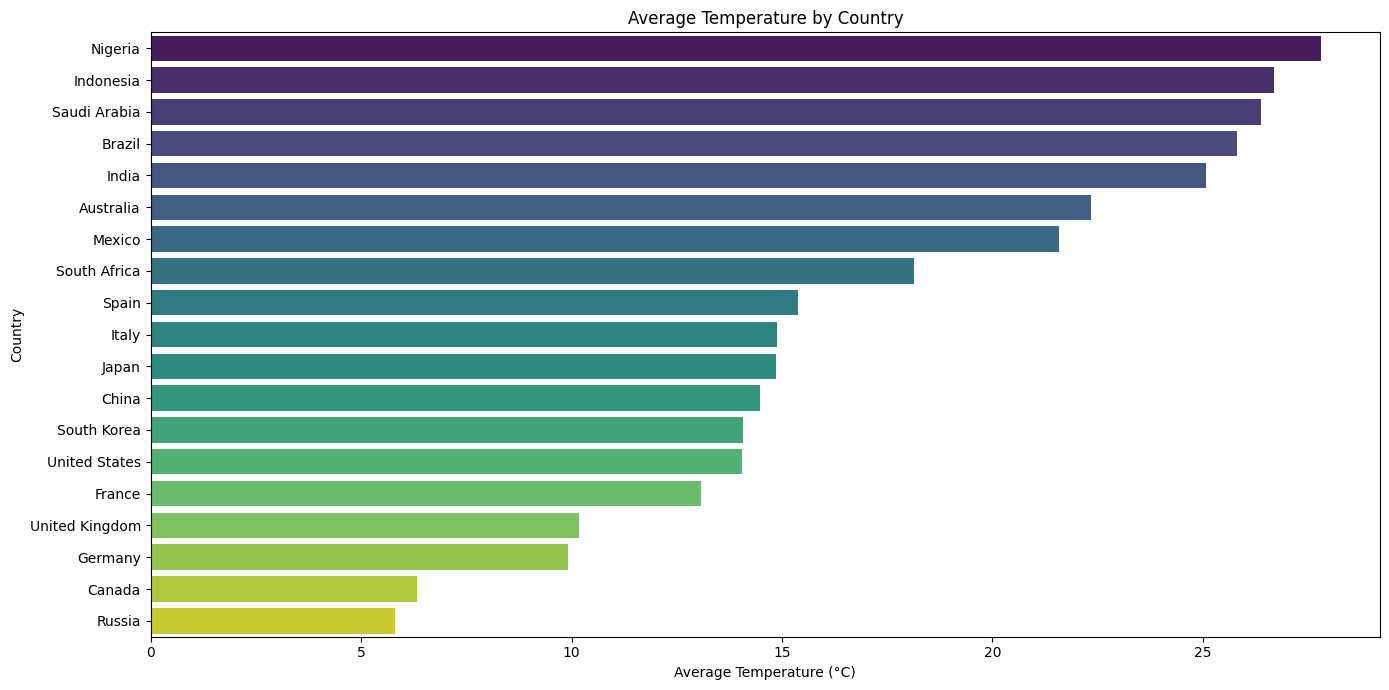

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the average temperature for each country
avg_temp_by_country = df.groupby('Country')['Avg_Temperature_degC'].mean().reset_index()

# Sort by average temperature for better visualization
avg_temp_by_country = avg_temp_by_country.sort_values(by='Avg_Temperature_degC', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Avg_Temperature_degC', y='Country', data=avg_temp_by_country, palette='viridis')
plt.title('Average Temperature by Country')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

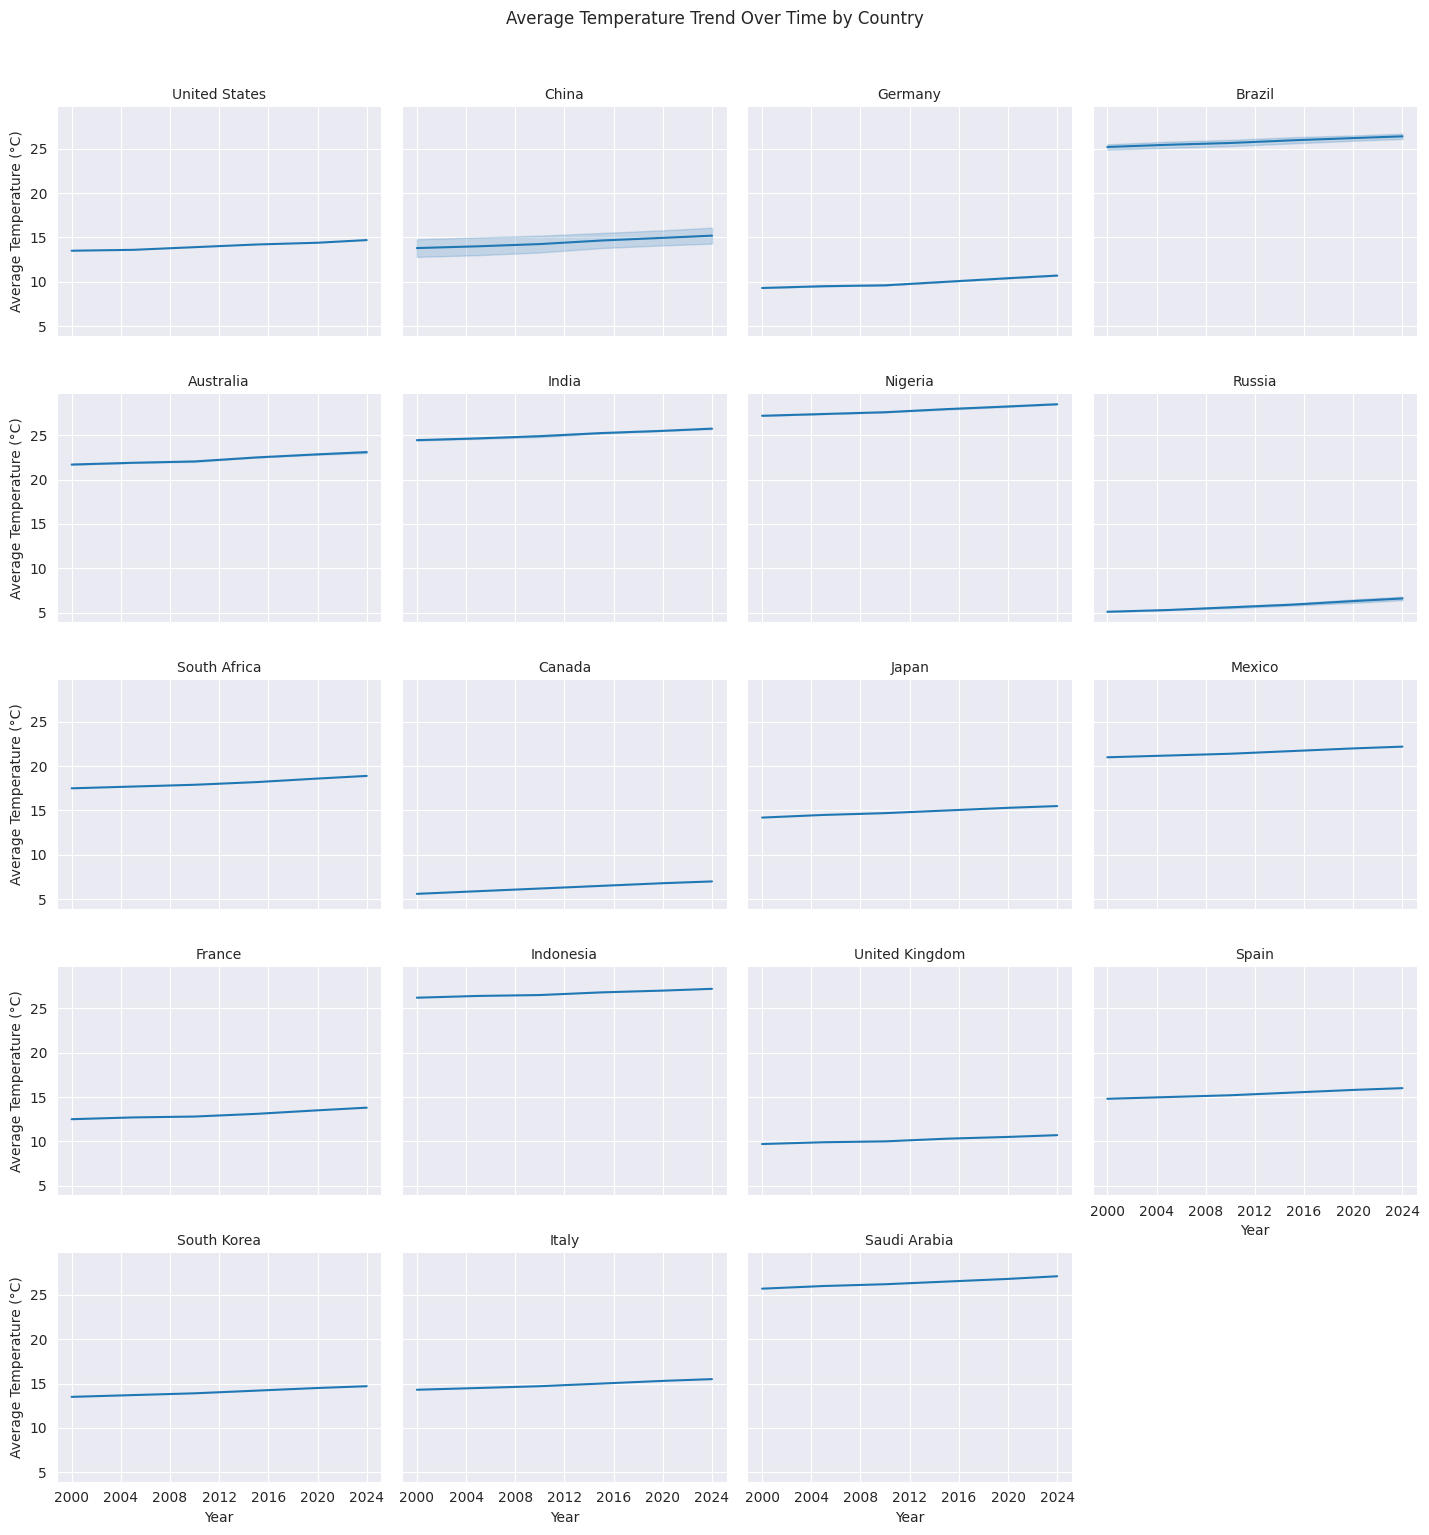

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create facet plots of line plots for each country
g = sns.FacetGrid(df, col="Country", col_wrap=4, height=3, aspect=1.2)
g.map(sns.lineplot, "Year", "Avg_Temperature_degC")

# Add titles and adjust layout
g.fig.suptitle("Average Temperature Trend Over Time by Country", y=1.02) # Adjust title position
g.set_titles("{col_name}")
g.set_xlabels("Year")
g.set_ylabels("Average Temperature (°C)")
plt.tight_layout()
plt.show()

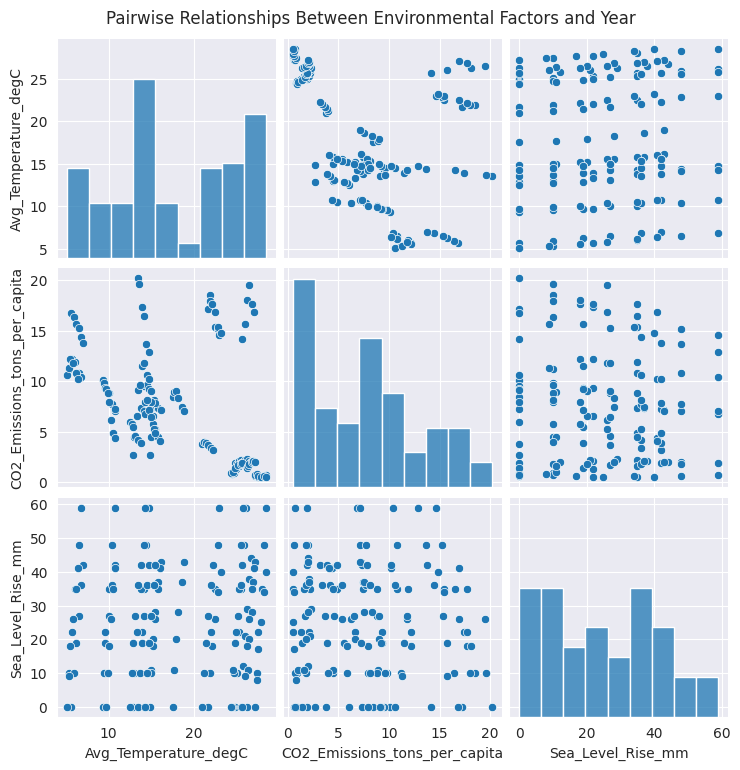

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the relevant columns for the scatter matrix
cols_to_plot = ['Year', 'Avg_Temperature_degC', 'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm']
df_subset = df[cols_to_plot]

# Create a scatter matrix (pair plot)
sns.pairplot(df_subset)
plt.suptitle('Pairwise Relationships Between Environmental Factors and Year', y=1.02)
plt.show()

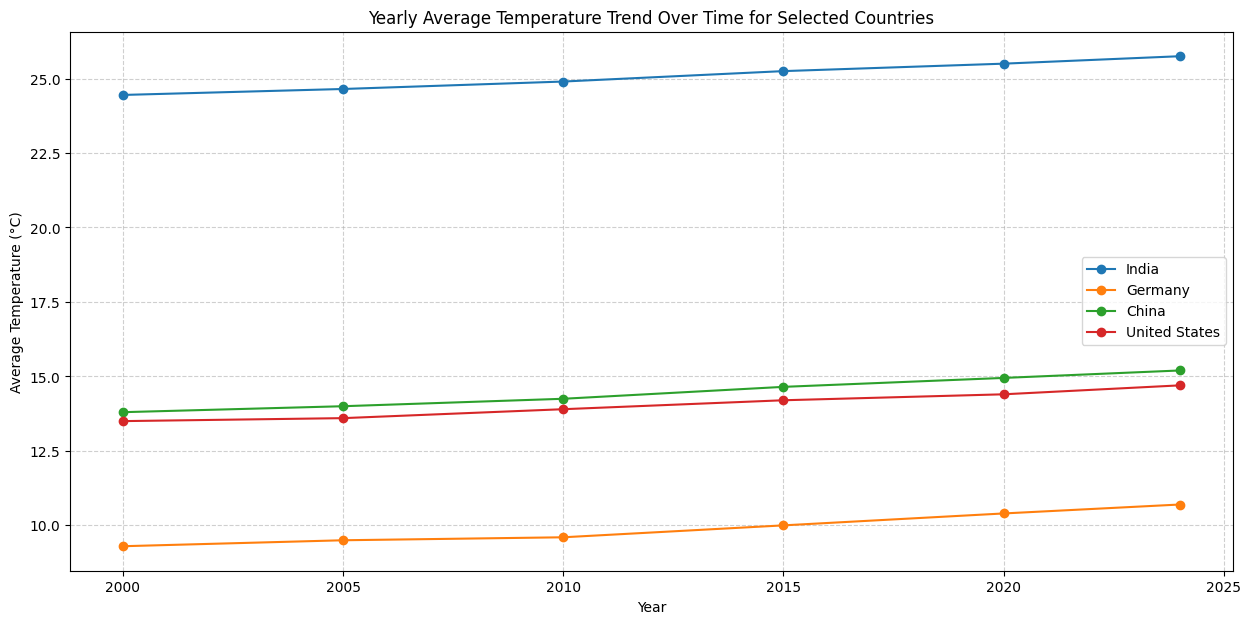

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of countries to plot
selected_countries = ['India', 'Germany', 'China', 'United States']

# Filter the DataFrame for the selected countries
df_selected_countries = df[df['Country'].isin(selected_countries)].copy()

# Calculate the yearly average temperature for each selected country
yearly_avg_temp_selected_countries = df_selected_countries.groupby(['Country', 'Year'])['Avg_Temperature_degC'].mean().reset_index()

# Plot the yearly average temperature over time for each selected country
plt.figure(figsize=(15, 7))
for country in selected_countries:
    subset = yearly_avg_temp_selected_countries[yearly_avg_temp_selected_countries['Country'] == country]
    plt.plot(subset['Year'], subset['Avg_Temperature_degC'], marker='o', linestyle='-', label=country)

plt.title('Yearly Average Temperature Trend Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

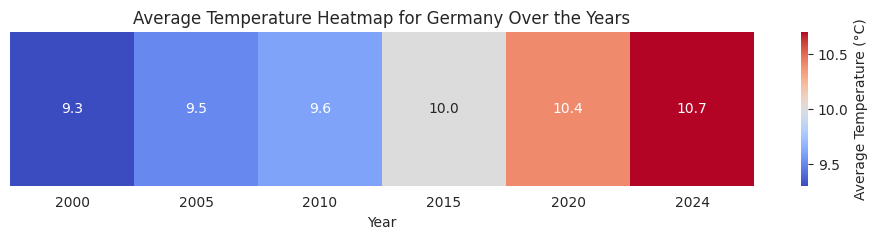

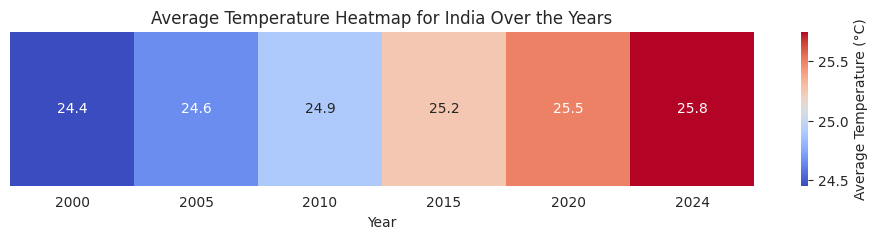

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data for Germany
df_germany = df[df['Country'] == 'Germany'].copy()

# Create heatmap data for Germany (Year vs Avg_Temperature_degC)
heatmap_germany_data = df_germany.pivot_table(index='Country', columns='Year', values='Avg_Temperature_degC')

# Plot heatmap for Germany
plt.figure(figsize=(12, 2)) # Smaller figure size as y-axis is just one category
sns.heatmap(heatmap_germany_data, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Average Temperature Heatmap for Germany Over the Years')
plt.xlabel('Year')
plt.ylabel('') # No need for y-label as it's just one country
plt.yticks([]) # Remove y-axis ticks
plt.show()

# Filter data for India
df_india = df[df['Country'] == 'India'].copy()

# Create heatmap data for India (Year vs Avg_Temperature_degC)
heatmap_india_data = df_india.pivot_table(index='Country', columns='Year', values='Avg_Temperature_degC')

# Plot heatmap for India
plt.figure(figsize=(12, 2)) # Smaller figure size
sns.heatmap(heatmap_india_data, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Average Temperature Heatmap for India Over the Years')
plt.xlabel('Year')
plt.ylabel('') # No need for y-label
plt.yticks([]) # Remove y-axis ticks
plt.show()